<a href="https://colab.research.google.com/github/toe-mas-koe-vik/AI_Finance/blob/main/2025_AIFF_GraphRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

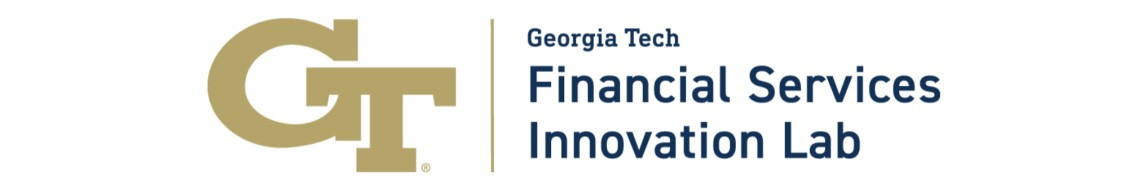

# **Graph Retreieval Augmented Generation**

### This Notebook was presented at the [Second Artificial Intelligence and The Future of Finance Conference](https://www.scheller.gatech.edu/events/ai-future-of-finance-conference/index.html)
 - #### **Author: Glenn Matlin**, with sincere appreciation to [Akash Desai](https://github.com/akashAD98) for code snippets
 - March 20, 2025


## Introduction

GraphRAG leverages a knowledge graph to organize information, enabling structured retrieval and multi-hop reasoning for question answering​.

GraphRAG (Graph-based Retrieval-Augmented Generation) uses large language models (LLMs) to extract entities and relationships from unstructured data into a graph structure. This approach enriches traditional RAG by mapping out how concepts are connected, which improves an LLM’s ability to handle complex queries and diverse data formats (e.g. text and CSV files) with greater accuracy​.

In this notebook, we demonstrate how to ingest a toy financial dataset into a GraphRAG knowledge graph and perform queries on it, integrating an LLM to answer questions using the graph-enhanced context.

# Installing libraries

In [ ]:
! pip install -U langchain-openai langchain-community
! pip install langchainhub
! pip install lancedb
! pip install graphrag

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.1/361.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.2/562.2 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

#Dataset Download

In [ ]:
!mkdir -p rag_exim/input
!wget -P rag_exim/input https://github.com/gtfintechlab/graphrag/source.txt

In [ ]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = "sk-proj-..."
os.environ["LANGCHAIN_TRACING_V2"] = "False"

In [ ]:
import bs4
from langchain import hub
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import LanceDB
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from lancedb.rerankers import LinearCombinationReranker


loader = TextLoader("/content/rag/source.txt")
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1100, chunk_overlap=100)
splits = text_splitter.split_documents(docs)
reranker = LinearCombinationReranker(weight=0.3)
vectorstore = LanceDB.from_documents(
    documents=splits, embedding=OpenAIEmbeddings(), reranker=reranker
)

retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

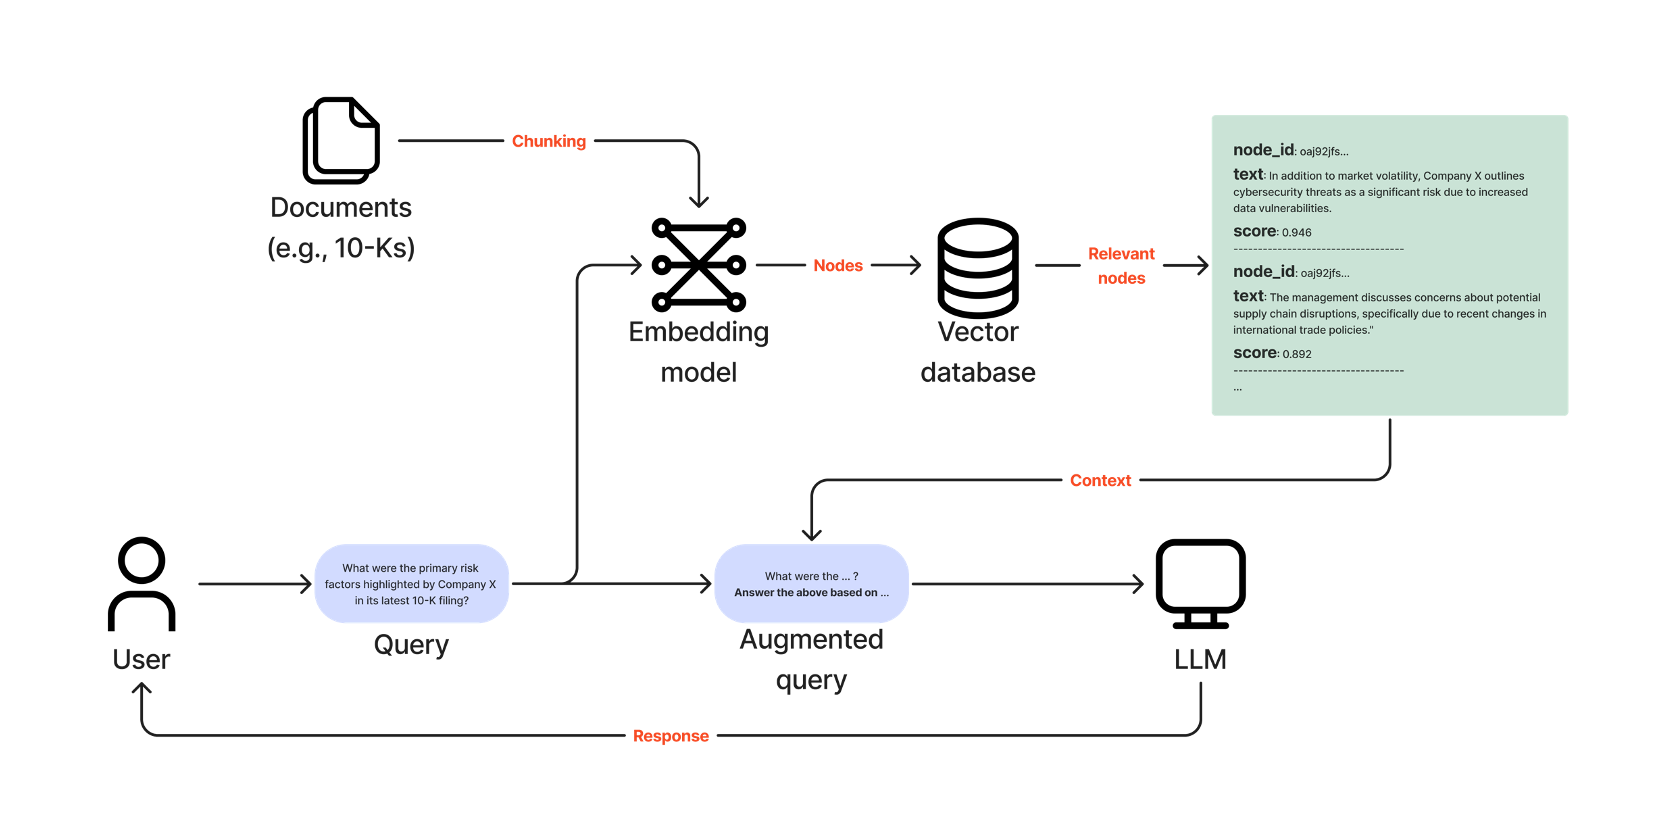

In [ ]:
llm = ChatOpenAI(model="gpt-4", temperature=0)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

query = "What are the export codes to be aware of for international trade?"

rag_chain.invoke(query)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


"Exporting involves deciding on the mode of shipping, working with a freight forwarder and customs clearance agent, and considering container shipping methods. It is important to procure goods as per buyer's requirements and maintain strict quality control for export goods. Exporting can lead to increasing profit margins, reducing production costs per unit, and improving liquidity through favorable payment terms."

#GraphRAG

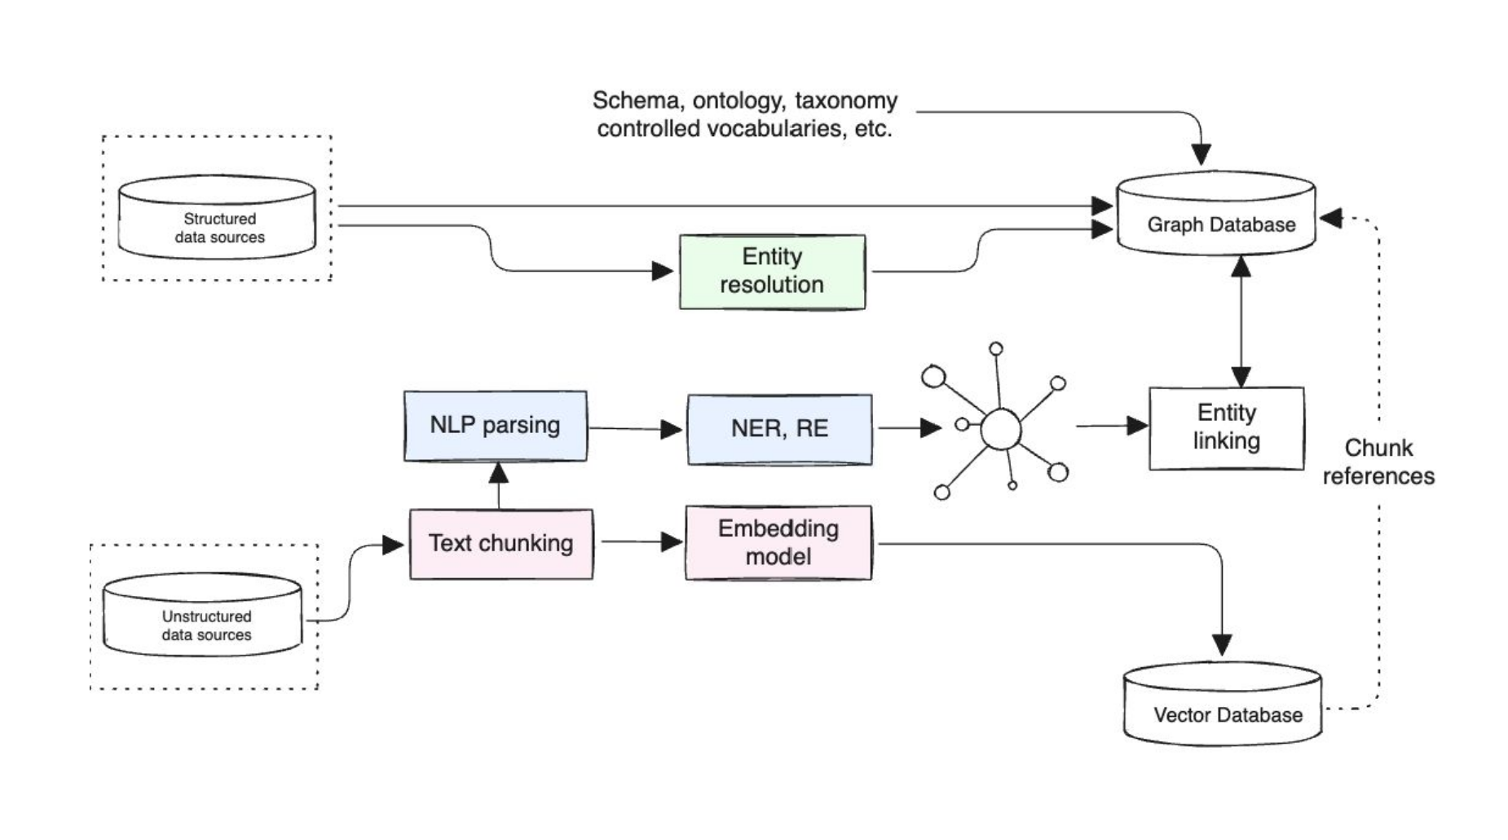

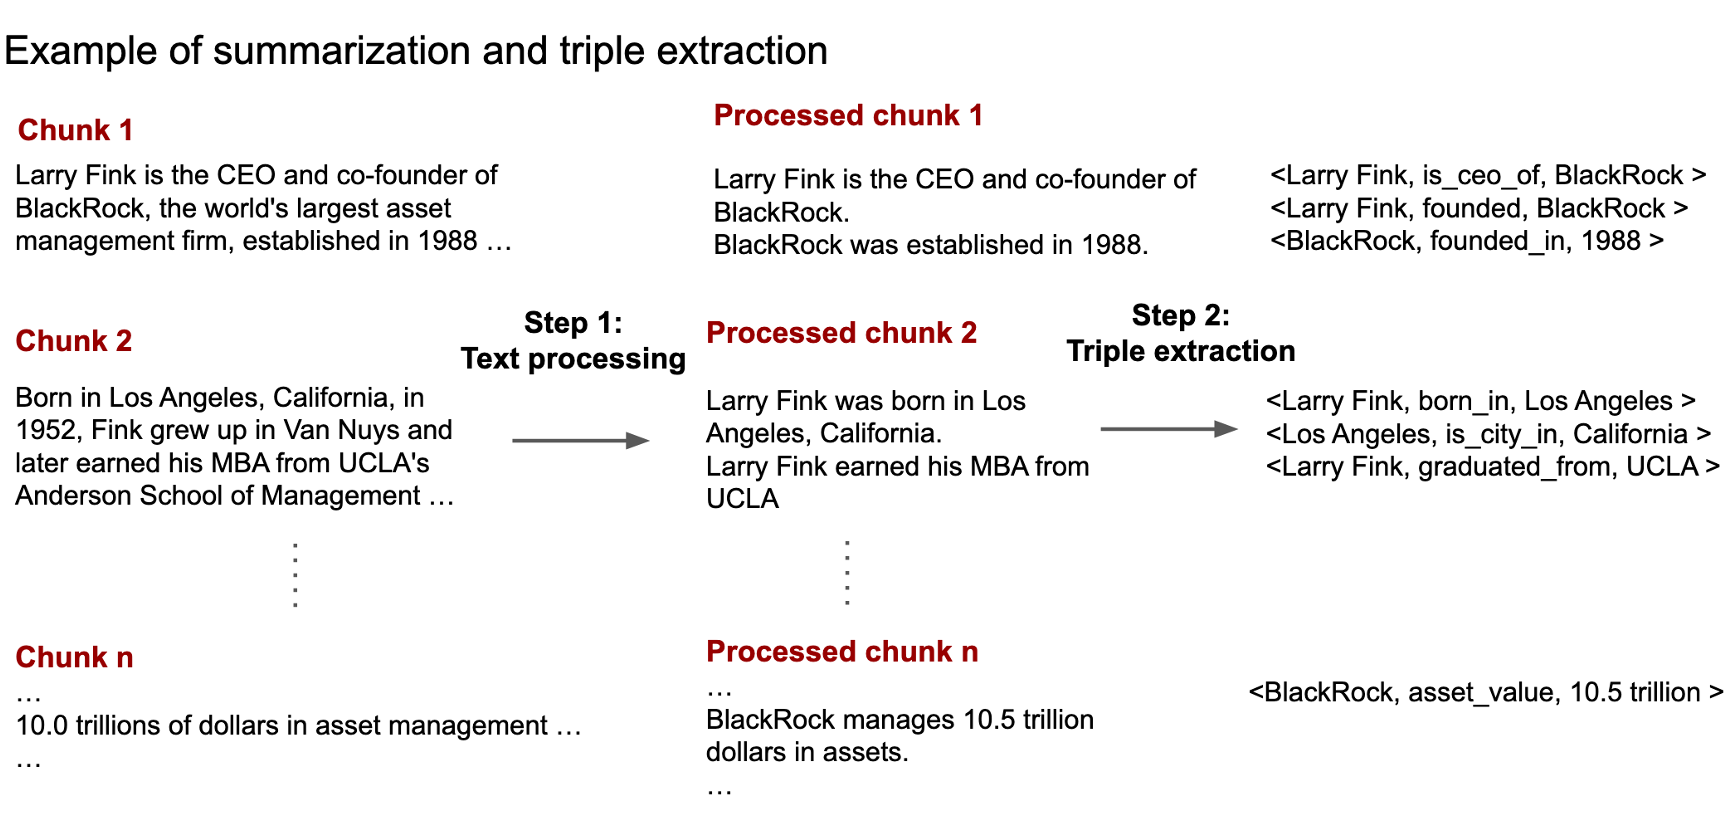

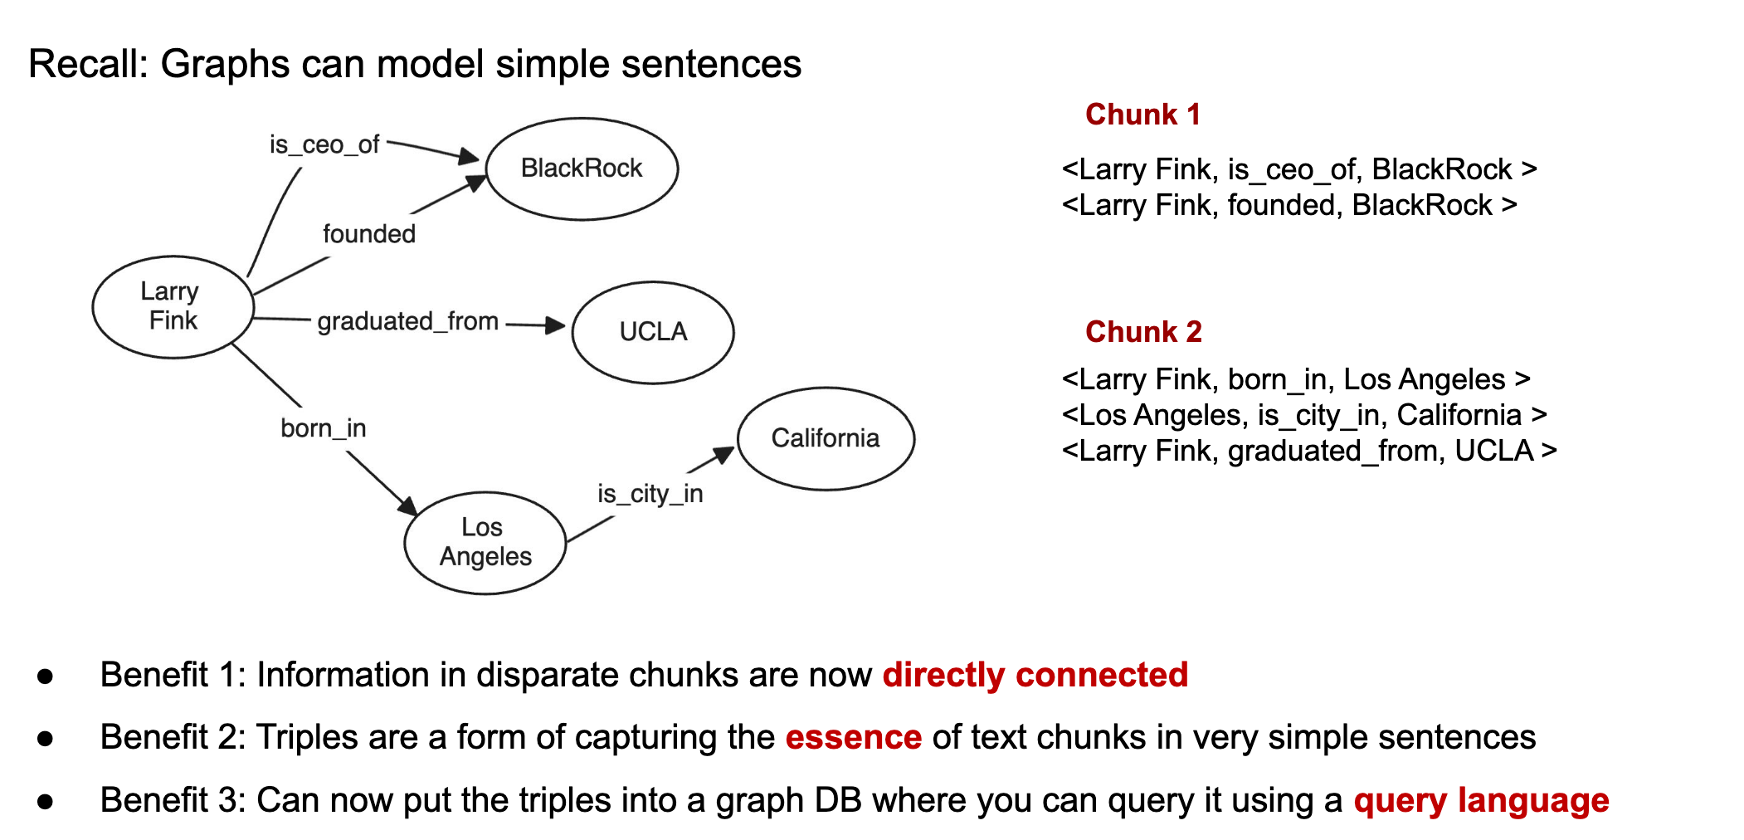

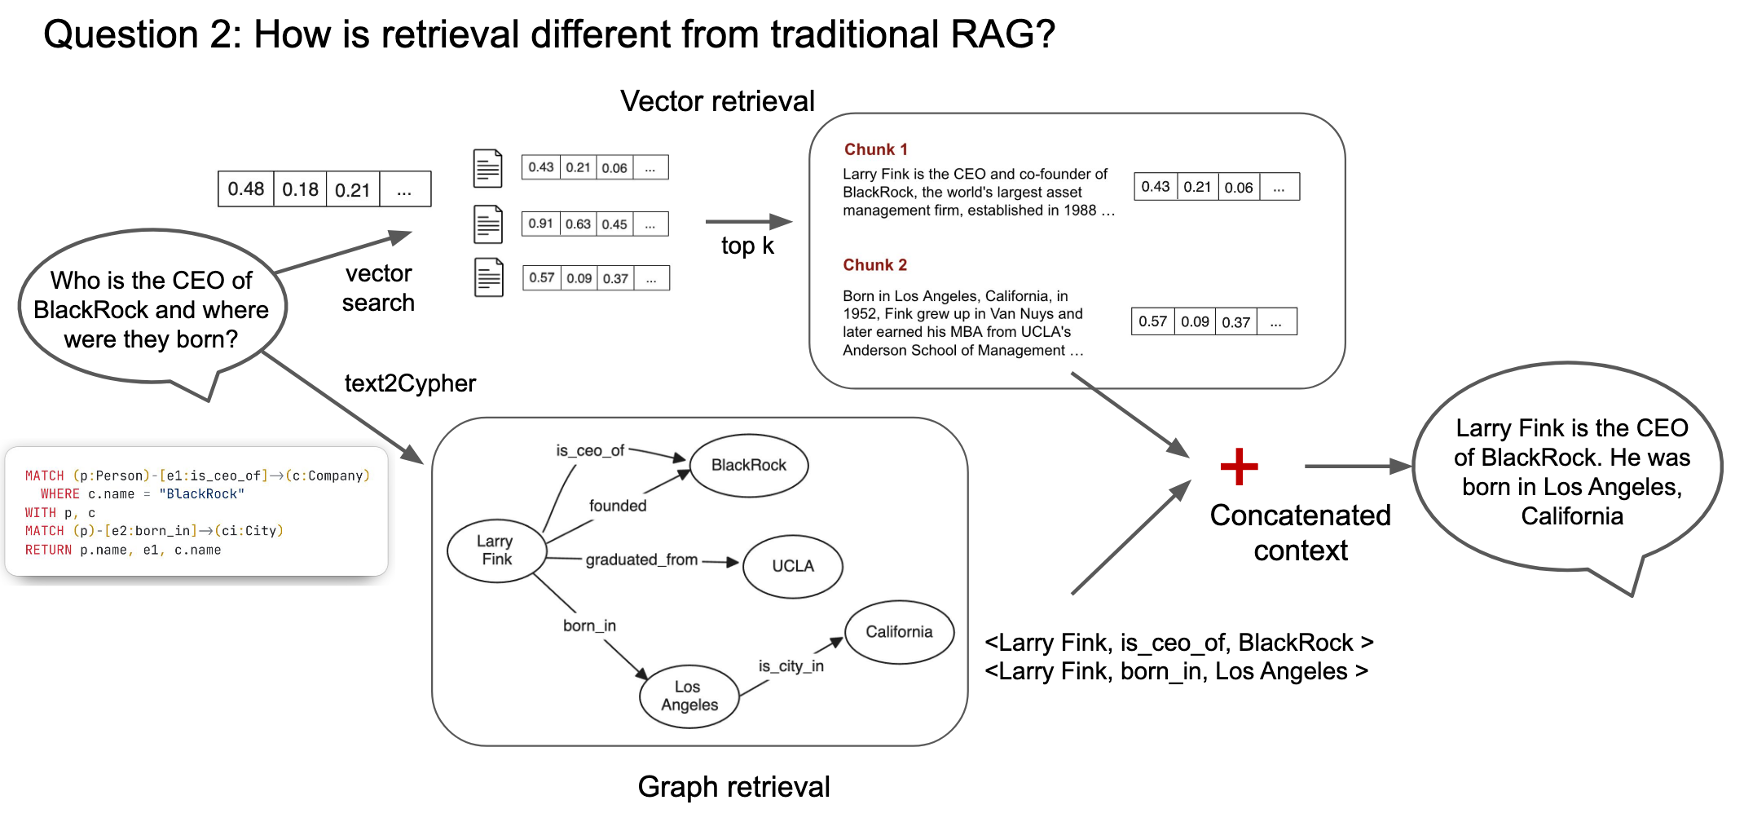

In [ ]:
import os
os.environ["GRAPHRAG_API_KEY"] = "sk-proj-..."

#### Step 1. Index the dataset


In [ ]:
!python3 -m graphrag.index --init --root /content/rag_exim

2024-11-24 06:59:56.100411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 06:59:56.140990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 06:59:56.153858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 06:59:58.188647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Initializing project at /content/rag_exim
⠋ GraphRAG Indexer 

In [ ]:
!python3 -m graphrag.index --root  /content/rag_exim

Streaming output truncated to the last 5000 lines.
└── create_summarized_entities
⠧ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (1 filtered) ━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 0:00:00
├── create_base_text_units
├── create_base_extracted_entities
└── create_summarized_entities
⠋ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (1 filtered) ━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 0:00:00
├── create_base_text_units
├── create_base_extracted_entities
└── create_summarized_entities
⠹ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (1 filtered) ━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 0:00:00
├── create_base_text_units
├── create_base_extracted_entities
└── create_summarized_entities
⠸ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (1 filtered) ━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00 0:00:00
├── create_base_text_units
├── create_base_extracted_entities
└── create_summarized_entities
⠼ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded 

#### Step 2. Execute our query


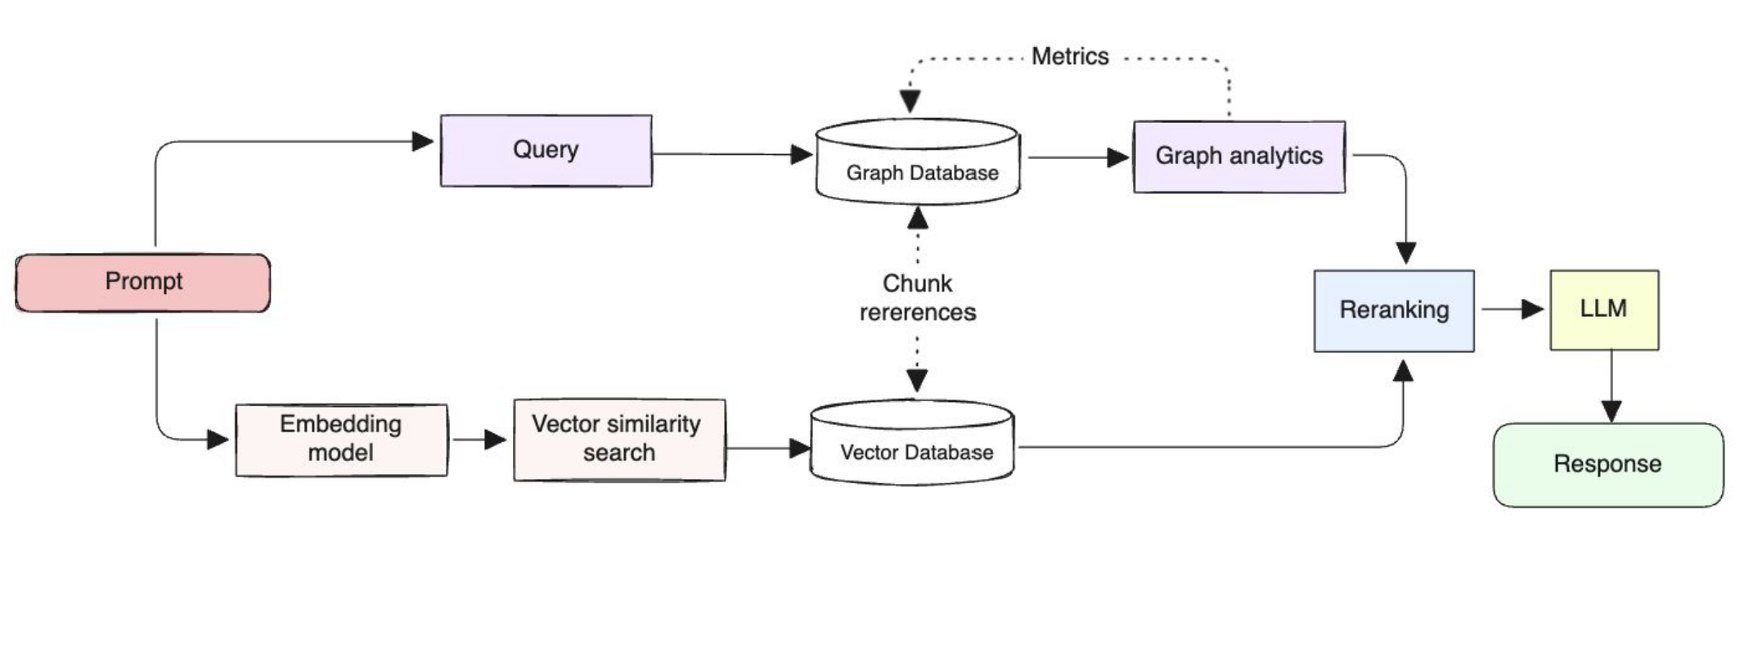

##### Step 2b. Global community search

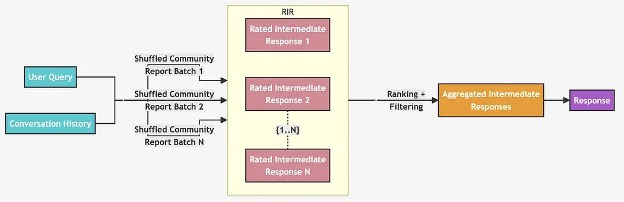

In [ ]:
!python3 -m graphrag.query --root /content/rag_exim --method global "What are the export codes to be aware of for international trade?"

2024-11-24 07:07:02.592036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 07:07:02.620399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 07:07:02.630765: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 07:07:04.281736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Reading settings from /content/rag_exim/settings.yaml
creating llm client with {'api_key': 'REDACTED,len=56', 'type': "openai_chat", 'model': 'gpt-4-turbo-preview', 'max_tokens': 4000, 'request_timeout': 180.0, 'api_base': None, 'api

##### Step 2c. Local community search

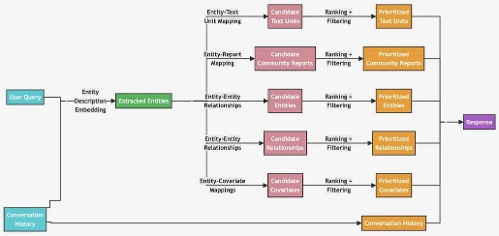

In [ ]:
!python3 -m graphrag.query --root /content/rag_exim --method local "What are the export codes to be aware of for international trade"

2024-11-24 07:07:55.064127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 07:07:55.088098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 07:07:55.096078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 07:07:56.557671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: Reading settings from /content/rag_exim/settings.yaml
[2024-11-24T07:08:08Z WARN  lance::dataset] No existing dataset at /content/lancedb/description_embedding.lance, it will be created
creating llm client with {'api_key': 'REDACTED,

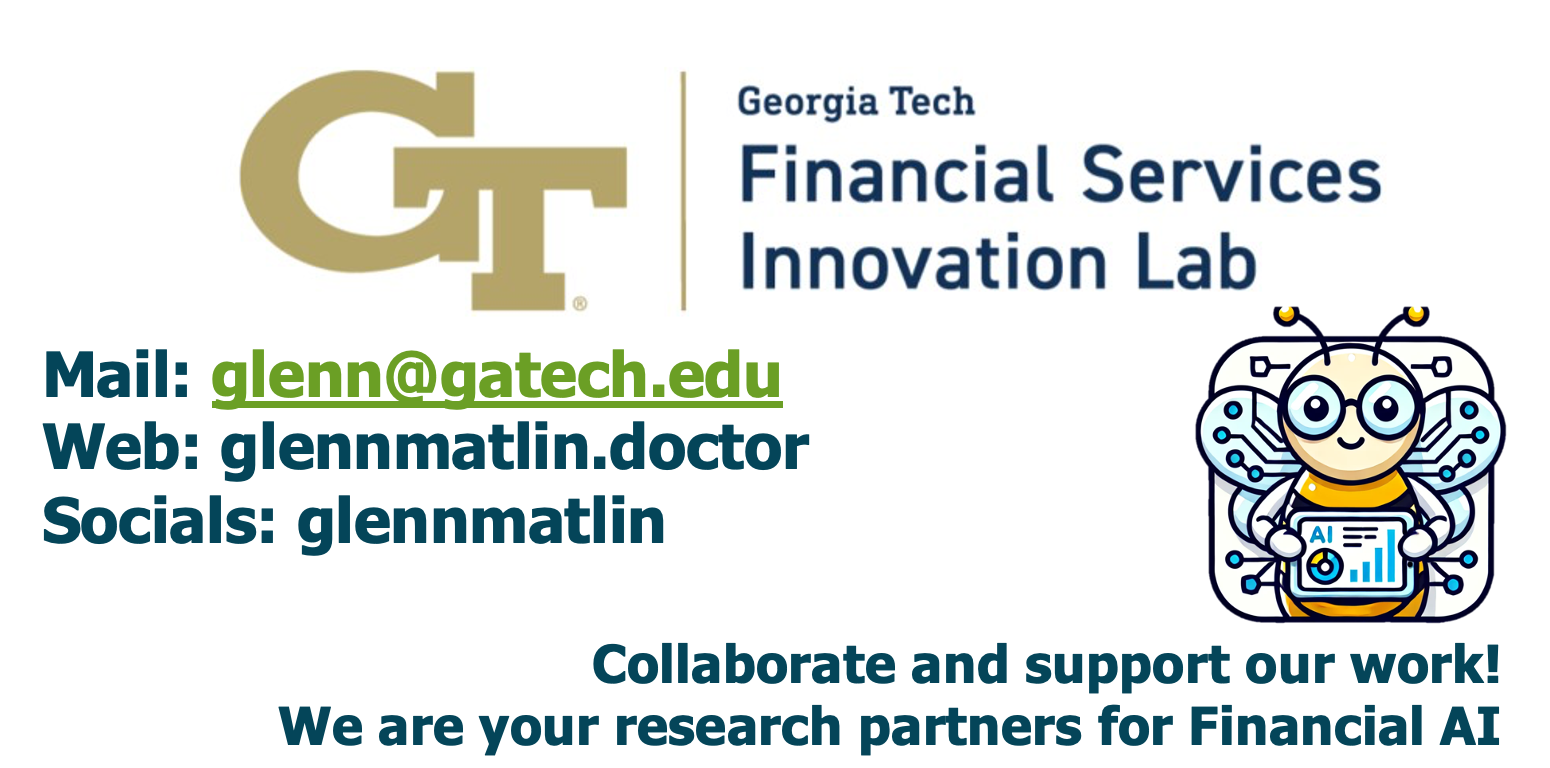